# Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('stud_math.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Функции

In [4]:
#вывод информации о столбце:
def print_colinfo(col, qnt_type=False):
    if qnt_type:
        col.hist()
        display(col.describe())
    else:
        display(col.value_counts())
    print(f"Кол-во пустых строк: {len(df)-col.count()} ({round((1-col.count()/len(df))*100, 1)}%)")

#выведение boxplot для столбца:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
#тест стьюдента:
def get_stat_dif(column):
    #.dropna().astype(str)
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Анализ данных в столбцах

 ## school — аббревиатура школы, в которой учится ученик

In [5]:
print_colinfo(df.school)

GP    349
MS     46
Name: school, dtype: int64

Кол-во пустых строк: 0 (0.0%)


Категориальный признак, аномалий и пустых строк нет.
***

## sex — пол ученика ('F' - женский, 'M' - мужской)

In [6]:
print_colinfo(df.sex)

F    208
M    187
Name: sex, dtype: int64

Кол-во пустых строк: 0 (0.0%)


Категориальный признак, аномалий и пустых строк нет.
***

##  age — возраст ученика (от 15 до 22)

In [7]:
print_colinfo(df.age)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Кол-во пустых строк: 0 (0.0%)


Категориальному признак, аномалий и пустых строк нет.
***

## address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [8]:
print_colinfo(df.address)

U    295
R     83
Name: address, dtype: int64

Кол-во пустых строк: 17 (4.3%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [9]:
print_colinfo(df.famsize)

GT3    261
LE3    107
Name: famsize, dtype: int64

Кол-во пустых строк: 27 (6.8%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [10]:
print_colinfo(df.Pstatus)

T    314
A     36
Name: Pstatus, dtype: int64

Кол-во пустых строк: 45 (11.4%)


Категориальный признак, аномалий нет, кол-во пустых строк более 10%
***

## Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [11]:
print_colinfo(df.Medu)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Кол-во пустых строк: 3 (0.8%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [12]:
print_colinfo(df.Fedu)

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Кол-во пустых строк: 24 (6.1%)


Категориальный признак, пустых строк менее 10%.

Единственное аномальное значеное "40" можно заменить на "4" или удалить.

Удалим аномалии:

In [13]:
df.Fedu = df.Fedu.apply(lambda x: x if 0 <= x <= 4 else None)

In [14]:
print_colinfo(df.Fedu)

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

Кол-во пустых строк: 25 (6.3%)


***

## Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [15]:
print_colinfo(df.Mjob)

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

Кол-во пустых строк: 19 (4.8%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

##  Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [16]:
print_colinfo(df.Fjob)

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Кол-во пустых строк: 36 (9.1%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [17]:
print_colinfo(df.reason)

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Кол-во пустых строк: 17 (4.3%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [18]:
print_colinfo(df.guardian)

mother    250
father     86
other      28
Name: guardian, dtype: int64

Кол-во пустых строк: 31 (7.8%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [19]:
print_colinfo(df.traveltime)

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Кол-во пустых строк: 28 (7.1%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [20]:
print_colinfo(df.studytime)

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Кол-во пустых строк: 7 (1.8%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [21]:
print_colinfo(df.failures)

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Кол-во пустых строк: 22 (5.6%)


Числовой признак, аномалий нет, пустых строк менее 10%.
***

## schoolsup — дополнительная образовательная поддержка (yes или no)

In [22]:
print_colinfo(df.schoolsup)

no     335
yes     51
Name: schoolsup, dtype: int64

Кол-во пустых строк: 9 (2.3%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## famsup — семейная образовательная поддержка (yes или no)

In [23]:
print_colinfo(df.famsup)

yes    219
no     137
Name: famsup, dtype: int64

Кол-во пустых строк: 39 (9.9%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## paid — дополнительные платные занятия по математике (yes или no)

In [24]:
print_colinfo(df.paid)

no     200
yes    155
Name: paid, dtype: int64

Кол-во пустых строк: 40 (10.1%)


Категориальный признак, аномалий нет, пустых строк 10%.
***

## activities — дополнительные внеучебные занятия (yes или no)

In [25]:
print_colinfo(df.activities)

yes    195
no     186
Name: activities, dtype: int64

Кол-во пустых строк: 14 (3.5%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## nursery — посещал детский сад (yes или no)

In [26]:
print_colinfo(df.nursery)

yes    300
no      79
Name: nursery, dtype: int64

Кол-во пустых строк: 16 (4.1%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## higher — хочет получить высшее образование (yes или no)

In [27]:
print_colinfo(df.higher)

yes    356
no      19
Name: higher, dtype: int64

Кол-во пустых строк: 20 (5.1%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## internet — наличие интернета дома (yes или no)

In [28]:
print_colinfo(df.internet)

yes    305
no      56
Name: internet, dtype: int64

Кол-во пустых строк: 34 (8.6%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## romantic — в романтических отношениях (yes или no)

In [29]:
print_colinfo(df.romantic)

no     240
yes    124
Name: romantic, dtype: int64

Кол-во пустых строк: 31 (7.8%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [30]:
print_colinfo(df.famrel)

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Кол-во пустых строк: 27 (6.8%)


Категориальный признак, пустых строк менее 10%.

Удалим аномальное значение:

In [31]:
df.famrel = df.famrel.apply(lambda x: x if 1 <= x <= 5 else None)

In [32]:
print_colinfo(df.famrel)

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

Кол-во пустых строк: 28 (7.1%)


***

## freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [33]:
print_colinfo(df.freetime)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Кол-во пустых строк: 11 (2.8%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [34]:
print_colinfo(df.goout)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Кол-во пустых строк: 8 (2.0%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [35]:
print_colinfo(df.health)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Кол-во пустых строк: 15 (3.8%)


Категориальный признак, аномалий нет, пустых строк менее 10%.
***

## absences — количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Кол-во пустых строк: 12 (3.0%)


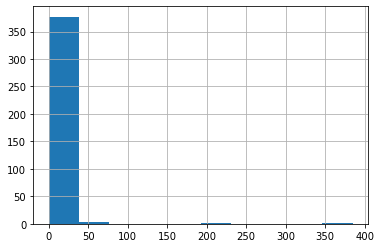

In [36]:
print_colinfo(df.absences, True)

Числовой признак, пустых строк менее 10%.

По гистограмме очевидно, что есть выбросы, найдём и удалим их:

In [37]:
q1 = df.absences.quantile(0.25)
q3 = df.absences.quantile(0.75)
IQR = q3-q1
minVal = q1 - 1.5*IQR
maxVal = q3 + 1.5*IQR
print(f"25-й перцентиль: {q1}",
f"75-й перцентиль: {q3}",
f"IQR: {IQR}",
f"Границы выбросов: [{minVal}, {maxVal}]", sep='\n')

df.absences = df.absences.apply(lambda x: x if minVal <= x <= maxVal else None)

25-й перцентиль: 0.0
75-й перцентиль: 8.0
IQR: 8.0
Границы выбросов: [-12.0, 20.0]


count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

Кол-во пустых строк: 29 (7.3%)


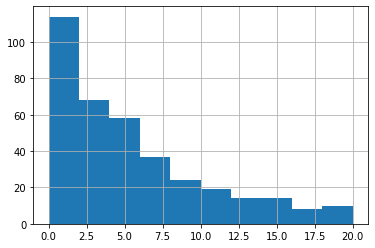

In [38]:
print_colinfo(df.absences, True)

***

## score — баллы по госэкзамену по математике

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Кол-во пустых строк: 6 (1.5%)


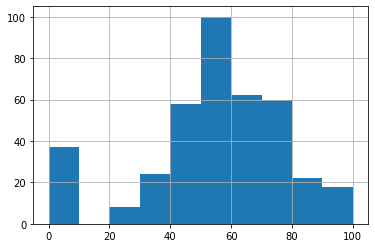

In [39]:
print_colinfo(df.score, True)

<AxesSubplot:xlabel='score'>

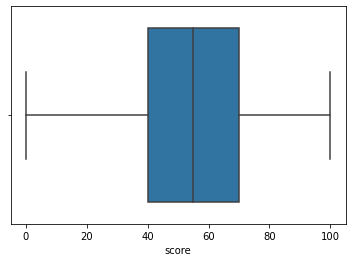

In [40]:
sns.boxplot(x=df.score)

Предсказываемая величина. Числовой признак.

Все значения находятся в допустимых пределах, выбросов нет. 

Кол-во пустых строк: 12 (3.0%)
***

## studytime, granular - ?

Недокументированный столбец. Переименуем для удобства анализа:

In [41]:
df['studytime2'] = df['studytime, granular']
df = df.drop(columns='studytime, granular')

In [42]:
print_colinfo(df.studytime2)

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime2, dtype: int64

Кол-во пустых строк: 7 (1.8%)


<AxesSubplot:xlabel='studytime2'>

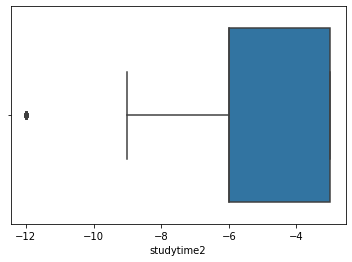

In [43]:
sns.boxplot(x=df.studytime2)

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime2, dtype: float64

Кол-во пустых строк: 7 (1.8%)


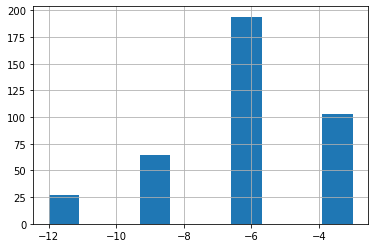

In [44]:
print_colinfo(df.studytime2, True)

Похоже, что столбец является категориальным признаком. 

Кол-во пустых строк: 7 (1.8%)

***

### Вывод:

Истинно числовыми признаками являются столбцы absences и score.
Остальные столбцы являются категориальными признаками.

Количество пустых строк в стобцах находится в пределах 11%, можно попробовать не заполнять строки и оставить пустые значения, если это позволяет способ дальнейшего анализа.

Нужно удалить строки которые имеют пустые значениея в столбце score, т.к. для анализа эти данные не подходят:

In [45]:
df.dropna(subset=['score'], inplace=True)

# Корреляционный анализ

<AxesSubplot:>

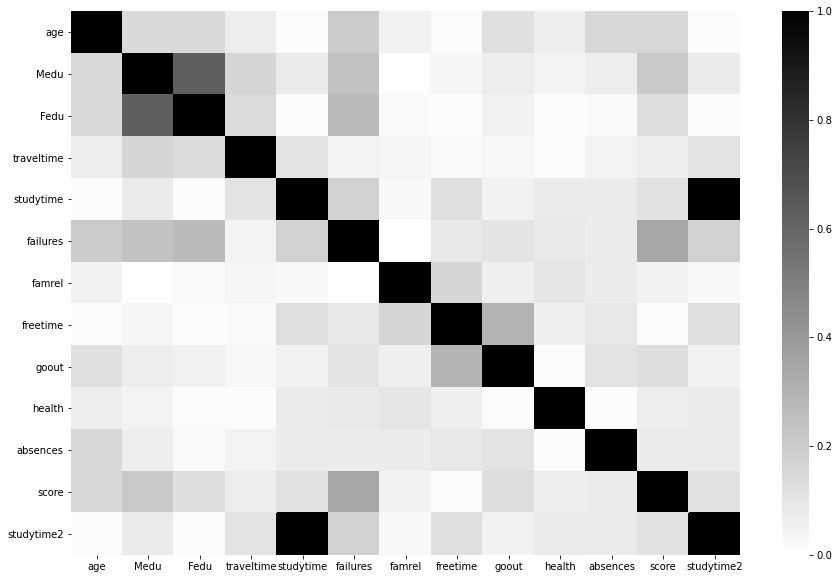

In [46]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr().abs(), vmin=0, vmax=1, cmap='binary')

In [47]:
df[['studytime', 'studytime2']].corr()

,studytime,studytime2
studytime,1.0,-1.0
studytime2,-1.0,1.0


Так как значения столбцов «studytime» «studytime2» полностью коррелируют, то второй столбец можно удалить.

In [48]:
df.drop(columns='studytime2', inplace=True)

# Анализ boxplot-графиков

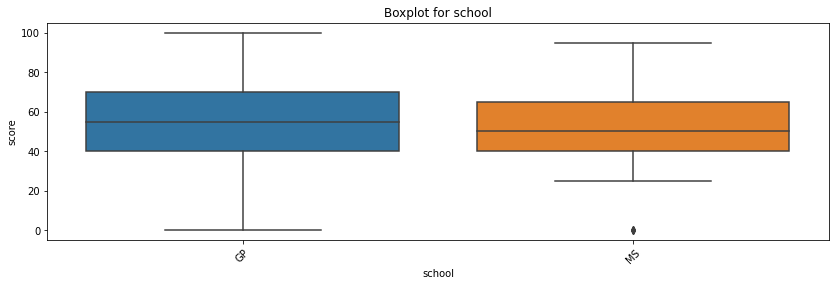

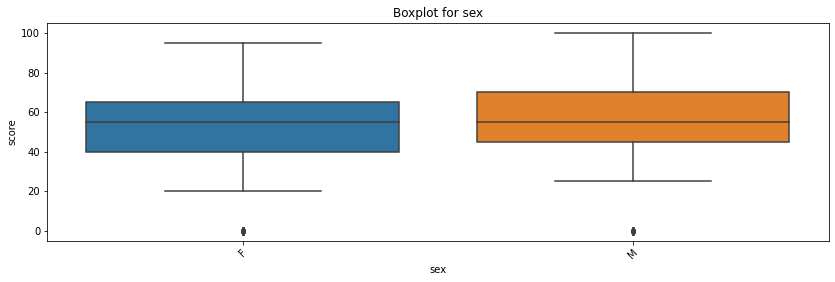

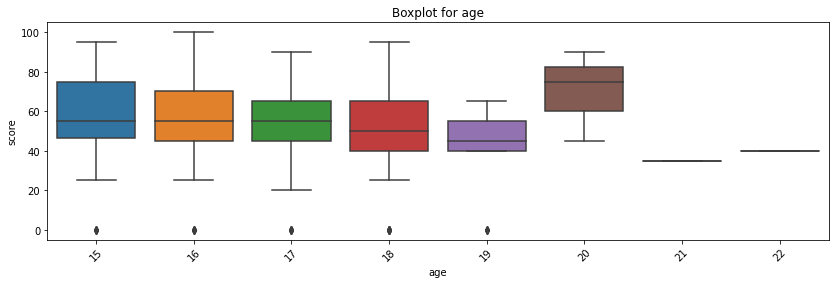

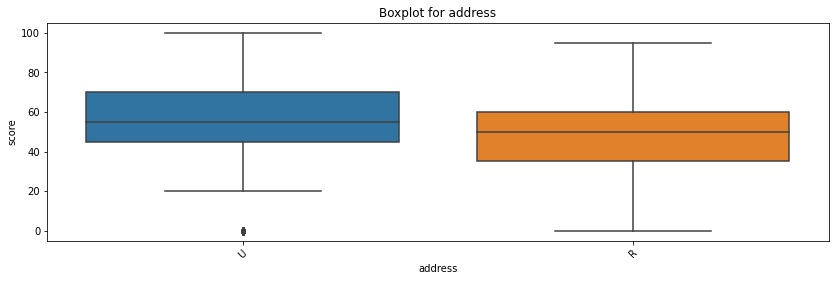

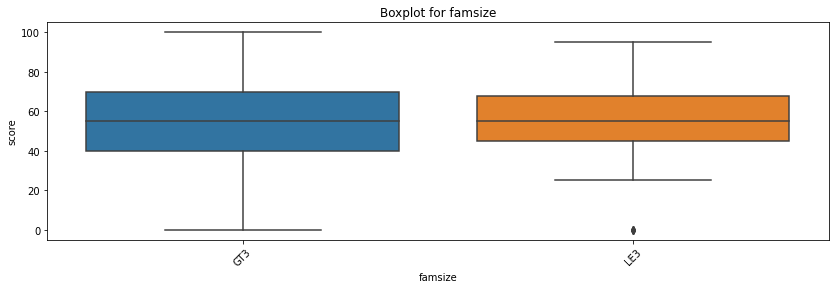

In [49]:
for col in df.columns[0:5]: get_boxplot(col)

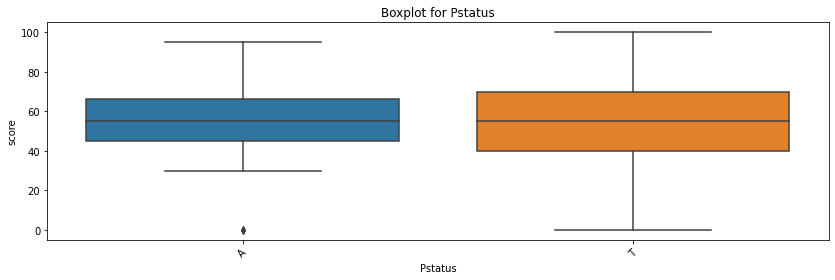

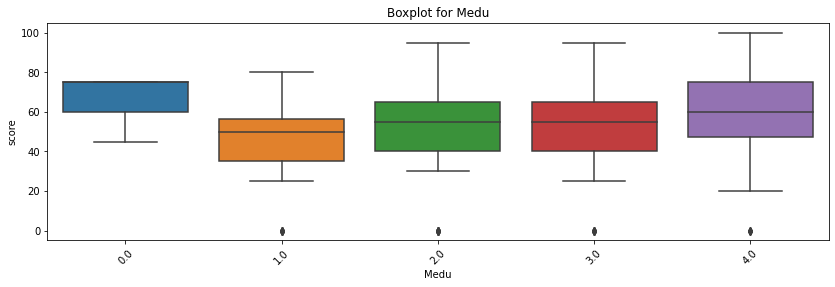

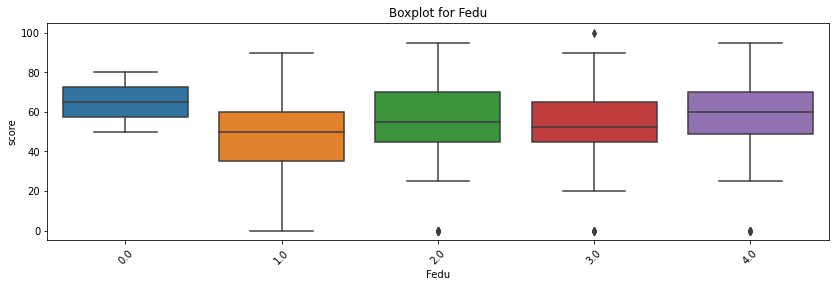

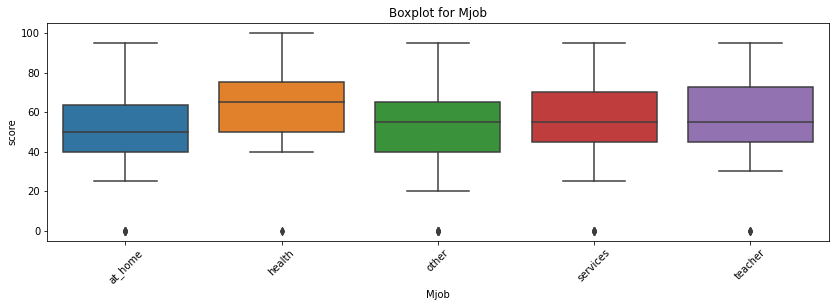

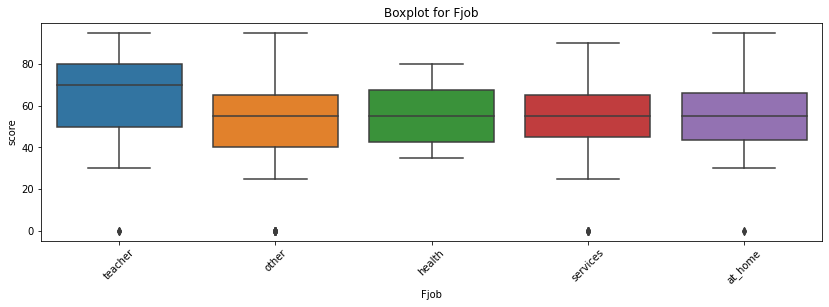

In [50]:
for col in df.columns[5:10]: get_boxplot(col)

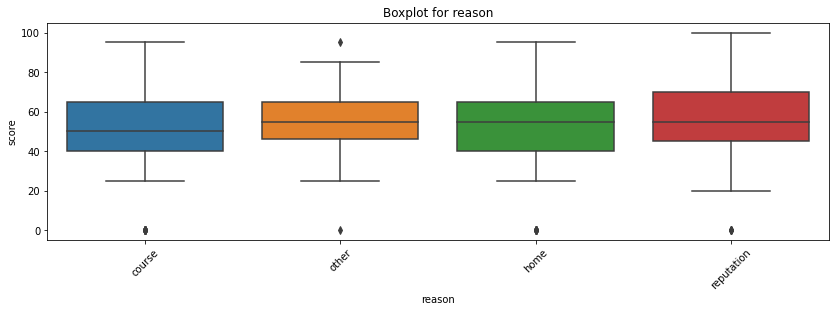

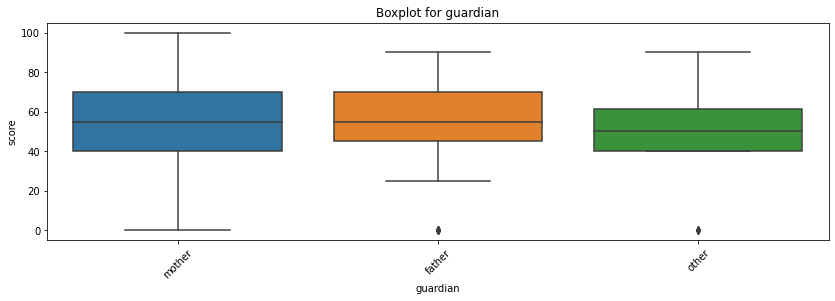

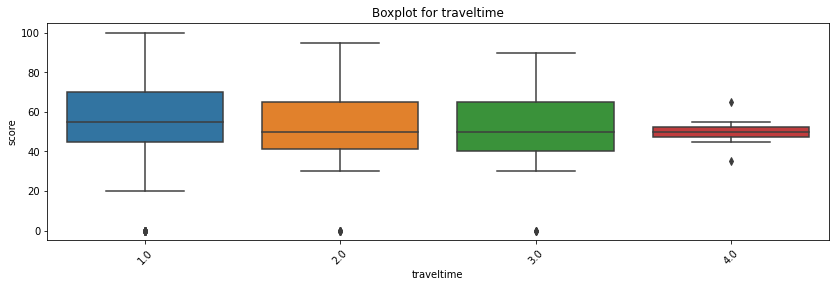

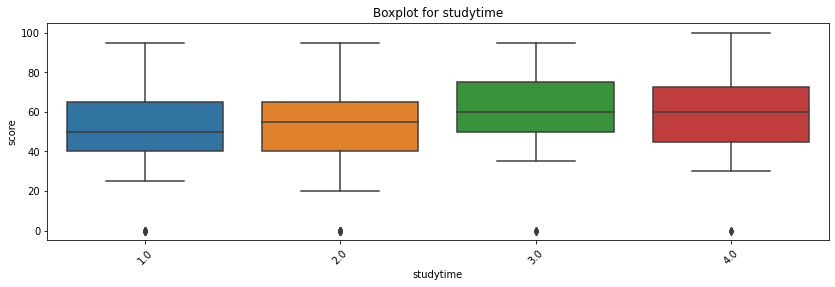

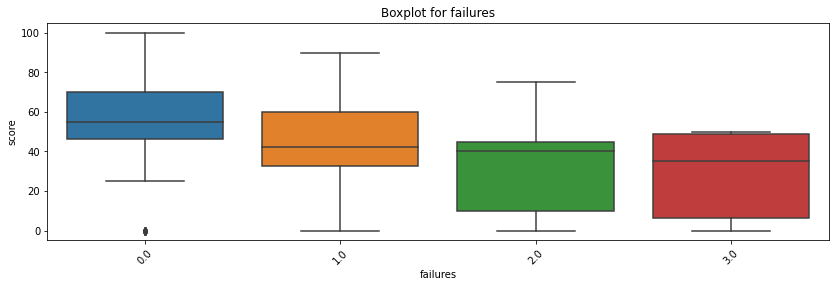

In [51]:
for col in df.columns[10:15]: get_boxplot(col)

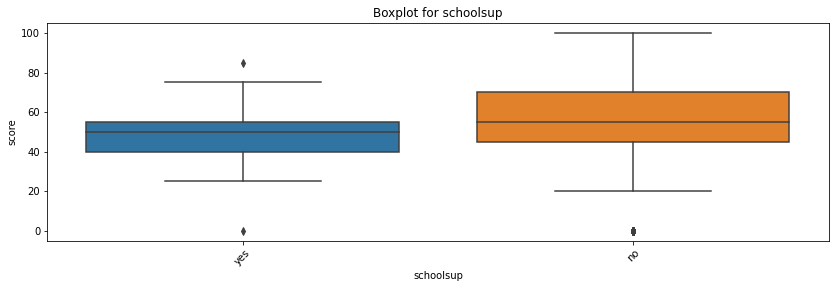

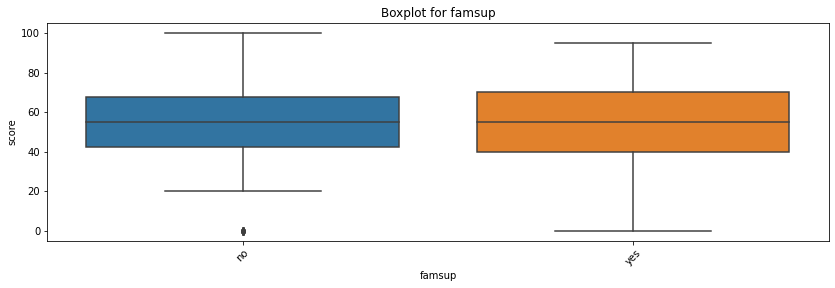

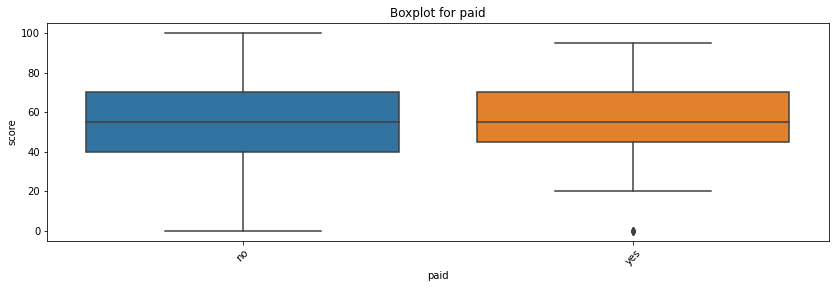

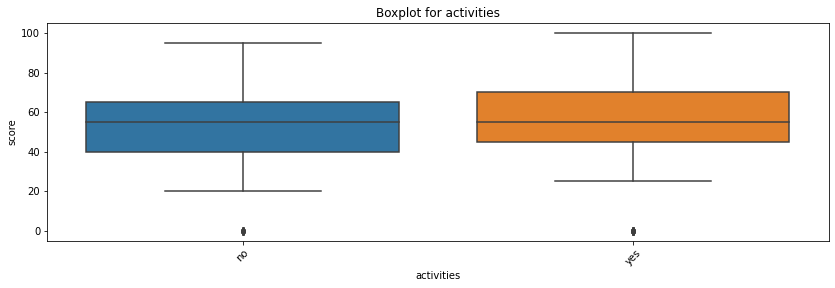

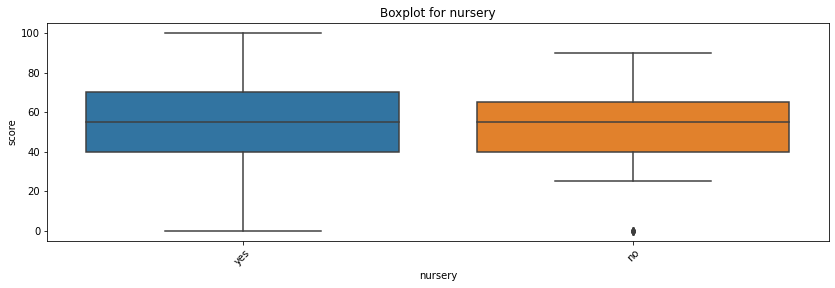

In [52]:
for col in df.columns[15:20]: get_boxplot(col)

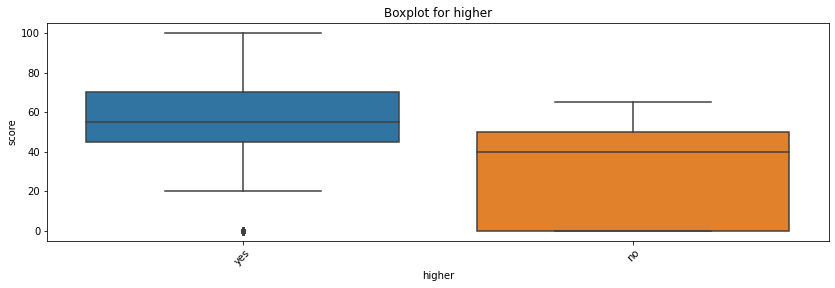

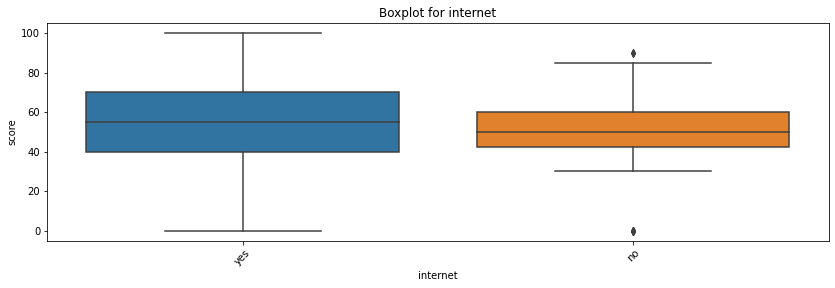

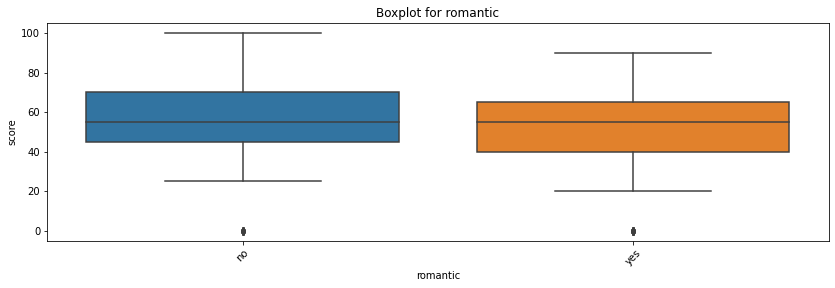

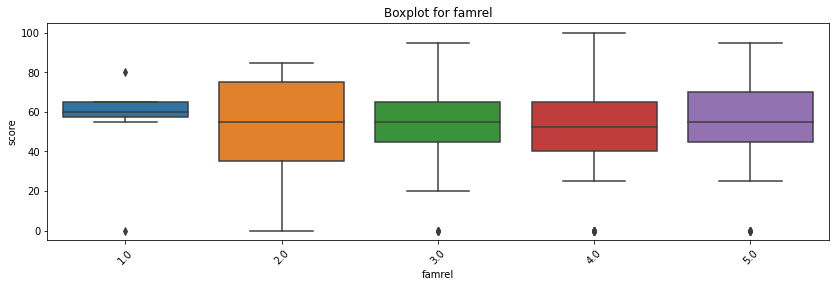

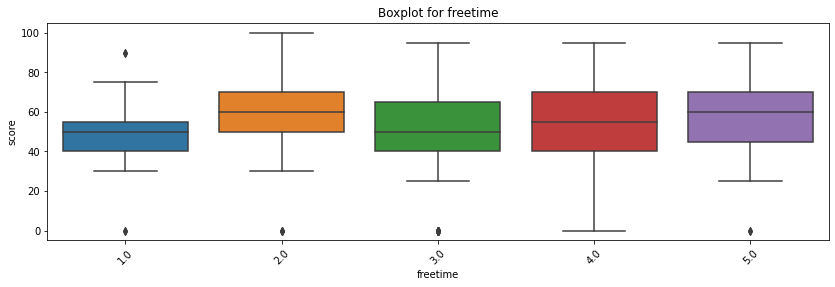

In [53]:
for col in df.columns[20:25]: get_boxplot(col)

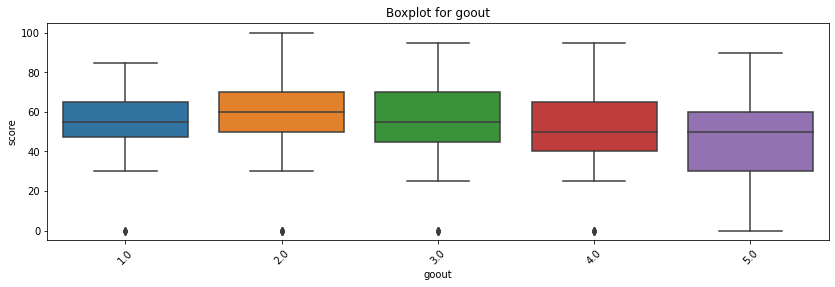

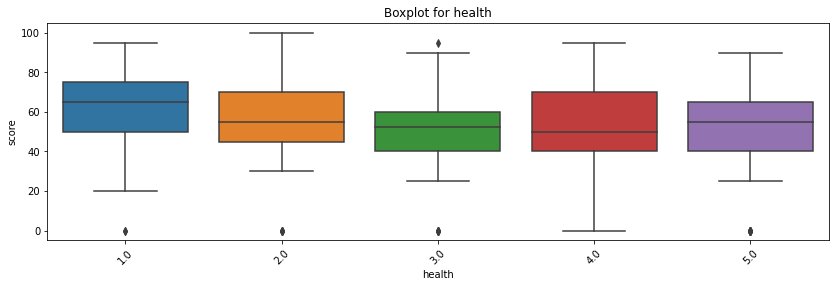

In [54]:
for col in df.columns[25:27]: get_boxplot(col)

# Тест Стьюдента

In [55]:
for col in df.columns[:-2]:
    get_stat_dif(col)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


В результате было выявлено, что самыми важными параметрами вляющими на количество балов являются:
- address
- Medu
- Mjob
- failures
- higher
- romantic
- goout
- absences

In [56]:
result_df = df.loc[:, ['address', 'Medu', 'Mjob', 'failures', 'higher', 'romantic', 'goout', 'absences', 'score']]
result_df

,address,Medu,Mjob,failures,higher,romantic,goout,absences,score
0,U,4.0,at_home,0.0,yes,no,4.0,6.0,30.0
1,U,1.0,at_home,0.0,yes,no,3.0,4.0,30.0
2,U,1.0,at_home,3.0,yes,NaN,2.0,10.0,50.0
3,U,4.0,health,0.0,yes,yes,2.0,2.0,75.0
4,U,3.0,other,0.0,yes,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...
390,U,2.0,services,2.0,yes,no,4.0,NaN,45.0
391,U,3.0,services,0.0,yes,no,5.0,3.0,80.0
392,R,1.0,other,3.0,NaN,no,3.0,3.0,35.0
393,R,3.0,services,0.0,yes,no,1.0,0.0,50.0
